# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#Do left join on Mouse ID 
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())

mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#there is bad data, at time point 5, there are 2 mice with the same ID
mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])
#Note, the above duplicated function was not required, the below function alone worked just fine to get the duplicate mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#chart data for mouse g989
mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop the bad data
#mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989"].head()
mouse_data_complete = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989"]
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())
mouse_count


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#group by drug regimen
mouse_data_complete_grouped = mouse_data_complete.groupby(["Drug Regimen"])
#calculate mean
mouse_data_complete_grouped_mean = mouse_data_complete_grouped["Tumor Volume (mm3)"].mean()
#calculate median
mouse_data_complete_grouped_median = mouse_data_complete_grouped["Tumor Volume (mm3)"].median()
#calculate variance
mouse_data_complete_grouped_variance = mouse_data_complete_grouped["Tumor Volume (mm3)"].var()
#calculate standard deviation
mouse_data_complete_grouped_std = mouse_data_complete_grouped["Tumor Volume (mm3)"].std()
#calculate SEM
mouse_data_complete_grouped_sem = mouse_data_complete_grouped["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_data_complete_grouped_summary = pd.DataFrame({"Mean Tumor Volume": mouse_data_complete_grouped_mean, "Median Tumor Volume": mouse_data_complete_grouped_median, "Tumor Volume Variance": mouse_data_complete_grouped_variance, "Tumor Volume Std. Dev.": mouse_data_complete_grouped_std, "Tumor Volume SEM": mouse_data_complete_grouped_sem})

mouse_data_complete_grouped_summary





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data_complete_grouped_summary_agg = mouse_data_complete_grouped.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
mouse_data_complete_grouped_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

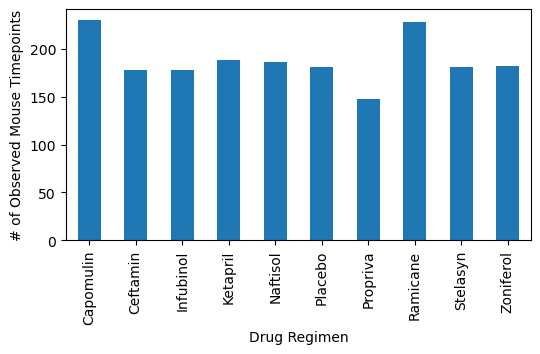

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# do value counts on mouse id 

mouse_data_complete_grouped_count = mouse_data_complete_grouped["Mouse ID"].count()
mouse_data_complete_grouped_count
#plot bar chart
mouse_data_complete_grouped_count.plot(kind="bar", figsize=(6,3))

#set y label
plt.ylabel("# of Observed Mouse Timepoints")

#set x label
plt.xlabel("Drug Regimen")

#show chart and set layout
plt.show()
plt.tight_layout()

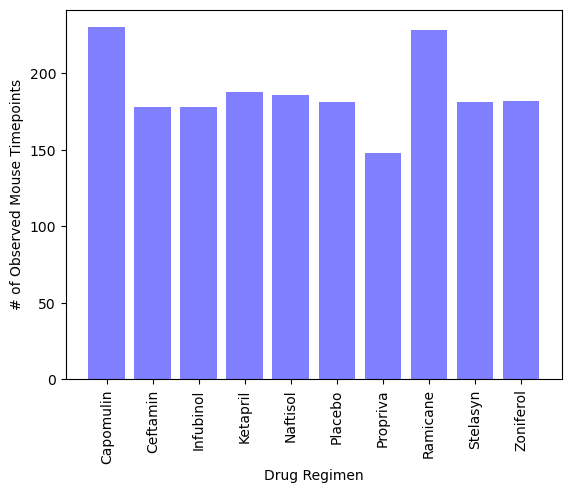

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
import numpy as np


#set x axis
x_axis = mouse_data_complete_grouped_count.index.values

#set y axis
y_axis = mouse_data_complete_grouped_count.values

#plot bar chart with blue color
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

#set x ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation="vertical")

#set y label
plt.ylabel("# of Observed Mouse Timepoints")

#set x label
plt.xlabel("Drug Regimen")

#show chart and set layout
plt.show()
plt.tight_layout()



      Sex  Mouse ID
0  Female       922
1    Male       958


<function matplotlib.pyplot.show(close=None, block=None)>

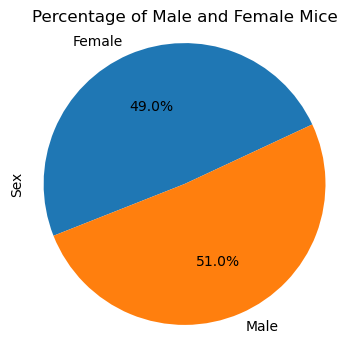

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# generate a dataframe for gender distribution among mice
#import pandas as pd
#import matplotlib.pyplot as plt
#mouse_gender = {'Sex': ['Male', 'Female'],
                #'Percentage': [51, 49]}
mouse_gender = mouse_data_complete.groupby('Sex').count()[['Mouse ID']]
mouse_gender = mouse_gender.reset_index()
print(mouse_gender)

#create data frame from data above
mouse_metadata = pd.DataFrame(mouse_gender)

# plot pie chart using pandas
plt.figure(figsize=(4, 4))
plt.pie(mouse_gender['Mouse ID'], labels=mouse_gender['Sex'], autopct='%1.1f%%', startangle=25)
plt.ylabel('Sex')
# label the pie chart
plt.title('Percentage of Male and Female Mice')
plt.axis('equal')
plt.show


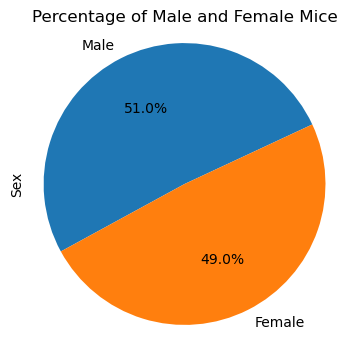

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

#data from dataframe
mouse_gender = {'Sex': ['Male', 'Female'],
        'Percentage': [51, 49]}

# create dataframe
mouse_metadata = pd.DataFrame(mouse_gender)

# plot pie chart using pyplot
plt.figure(figsize=(4, 4))
plt.pie(mouse_gender['Percentage'], labels=mouse_gender['Sex'], autopct='%1.1f%%', startangle=25)
plt.ylabel('Sex')
plt.title('Percentage of Male and Female Mice')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# use groupby on 'MouseId' with .max restrict to 'Timepoint'

mouse_data_complete_grouped_max = mouse_data_complete.groupby("Mouse ID")['Timepoint'].max()


# reset_index on that
mouse_data_complete_grouped_max = mouse_data_complete_grouped_max.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(mouse_data_complete_grouped_max, mouse_data_complete, on=["Mouse ID", "Timepoint"], how="left")


# Merge on ['Mouse ID', 'Timepoint']
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]


# Display the data table for preview
final_tumor_volume.head(5)         

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
     
    # Get a dataframe using .loc where 'Drug Regimen' == treatment, restrict to 'Tumor Volume (mm3)'
    drug_regimen_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    
    # add subset 
    tumor_vol_data.append(drug_regimen_treatment)


    
    # Determine outliers using upper and lower bounds
    quartiles = drug_regimen_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor voluem is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    


The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor voluem is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor voluem is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor voluem is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of tumor volume is: 48.72207785
The upper quartile of tum

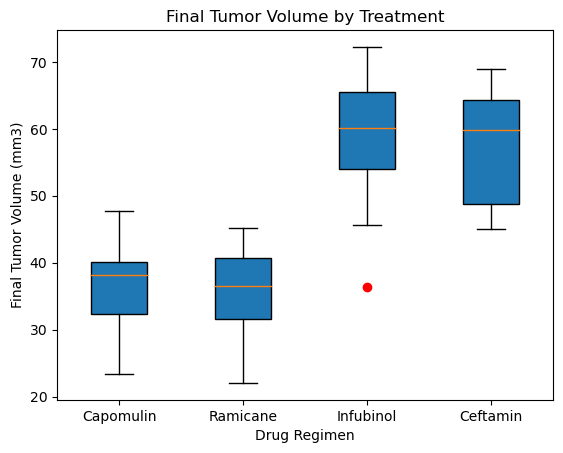

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_regimens = []


labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# plot box plot
plt.boxplot(tumor_vol_data, labels=labels, sym='r', vert=True, patch_artist=True)

# label box plot
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# show box plot
plt.show()


## Line and Scatter Plots

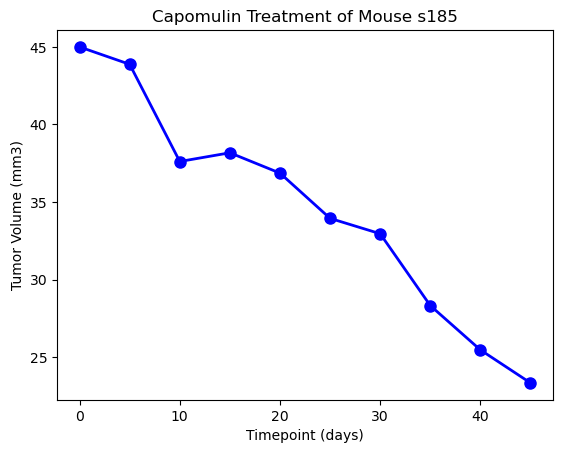

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# do .loc on clean data complete, then do .loc for a specific mouse of your choosing
capomulin_line_plot = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == 's185']

time_point = capomulin_line_plot['Timepoint']
tumor_volume = capomulin_line_plot['Tumor Volume (mm3)']

# plot line chart
plt.plot(time_point, tumor_volume, marker='o', color='blue', label='Tumor Volume (mm3)', linewidth=2, markersize=8)

# label line chart
plt.title('Capomulin Treatment of Mouse s185')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

# show line chart
plt.show()

/var/folders/dn/3l1c3sld1b77mm1d_l64vfx40000gn/T/ipykernel_12409/1864655813.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_scatter_plot = capomulin_scatter_plot.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]


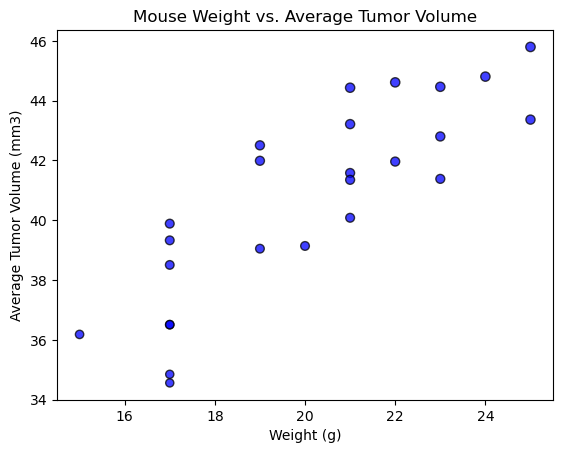

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# use your Capomulin data frame
capomulin_scatter_plot = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']

# groupby 'Mouse ID' and get the mean of 'Tumor Volume (mm3)'
capomulin_scatter_plot = capomulin_scatter_plot.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]
capomulin_scatter_plot = capomulin_scatter_plot.reset_index()

# plot scatter chart
plt.scatter(capomulin_scatter_plot['Weight (g)'], capomulin_scatter_plot['Tumor Volume (mm3)'], marker='o', facecolors='blue', edgecolors='black', s=capomulin_scatter_plot['Tumor Volume (mm3)'], alpha=.75)

# label scatter chart
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

# show scatter chart
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


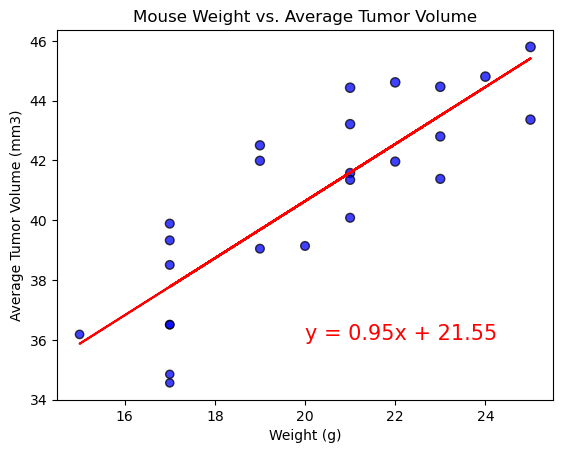

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# for entire Capomulin data
correlation = st.pearsonr(capomulin_scatter_plot['Weight (g)'], capomulin_scatter_plot['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# linear regression model
from scipy.stats import linregress
x_values = capomulin_scatter_plot['Weight (g)']
y_values = capomulin_scatter_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# get line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter chart
plt.scatter(x_values,y_values, marker='o', facecolors='blue', edgecolors='black', s=capomulin_scatter_plot['Tumor Volume (mm3)'], alpha=.75)

# plot regression line
plt.plot(x_values,regress_values,"r-")

# label scatter chart
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

# show scatter chart
plt.show()
